In [114]:
# load data
import numpy as np
from sklearn import datasets
boston = datasets.load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


/opt/anaconda3/envs/ee511/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

In [115]:
# a form of summary of the data
feature = boston.data
price = boston.target
print('data size = ', feature.shape)
print('target size = ', price.shape)
print('feature attributes: ', boston.feature_names)
print(boston.DESCR)

data size =  (506, 13)
target size =  (506,)
feature attributes:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employme

In [116]:
# more details of the data
import pandas as pd
df_feature = pd.DataFrame(feature, columns = boston.feature_names)
df_target = pd.DataFrame(price, columns =['MEDV'])
df_boston = pd.concat([df_feature, df_target,], axis = 1)

In [117]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [118]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Figure size 640x480 with 0 Axes>

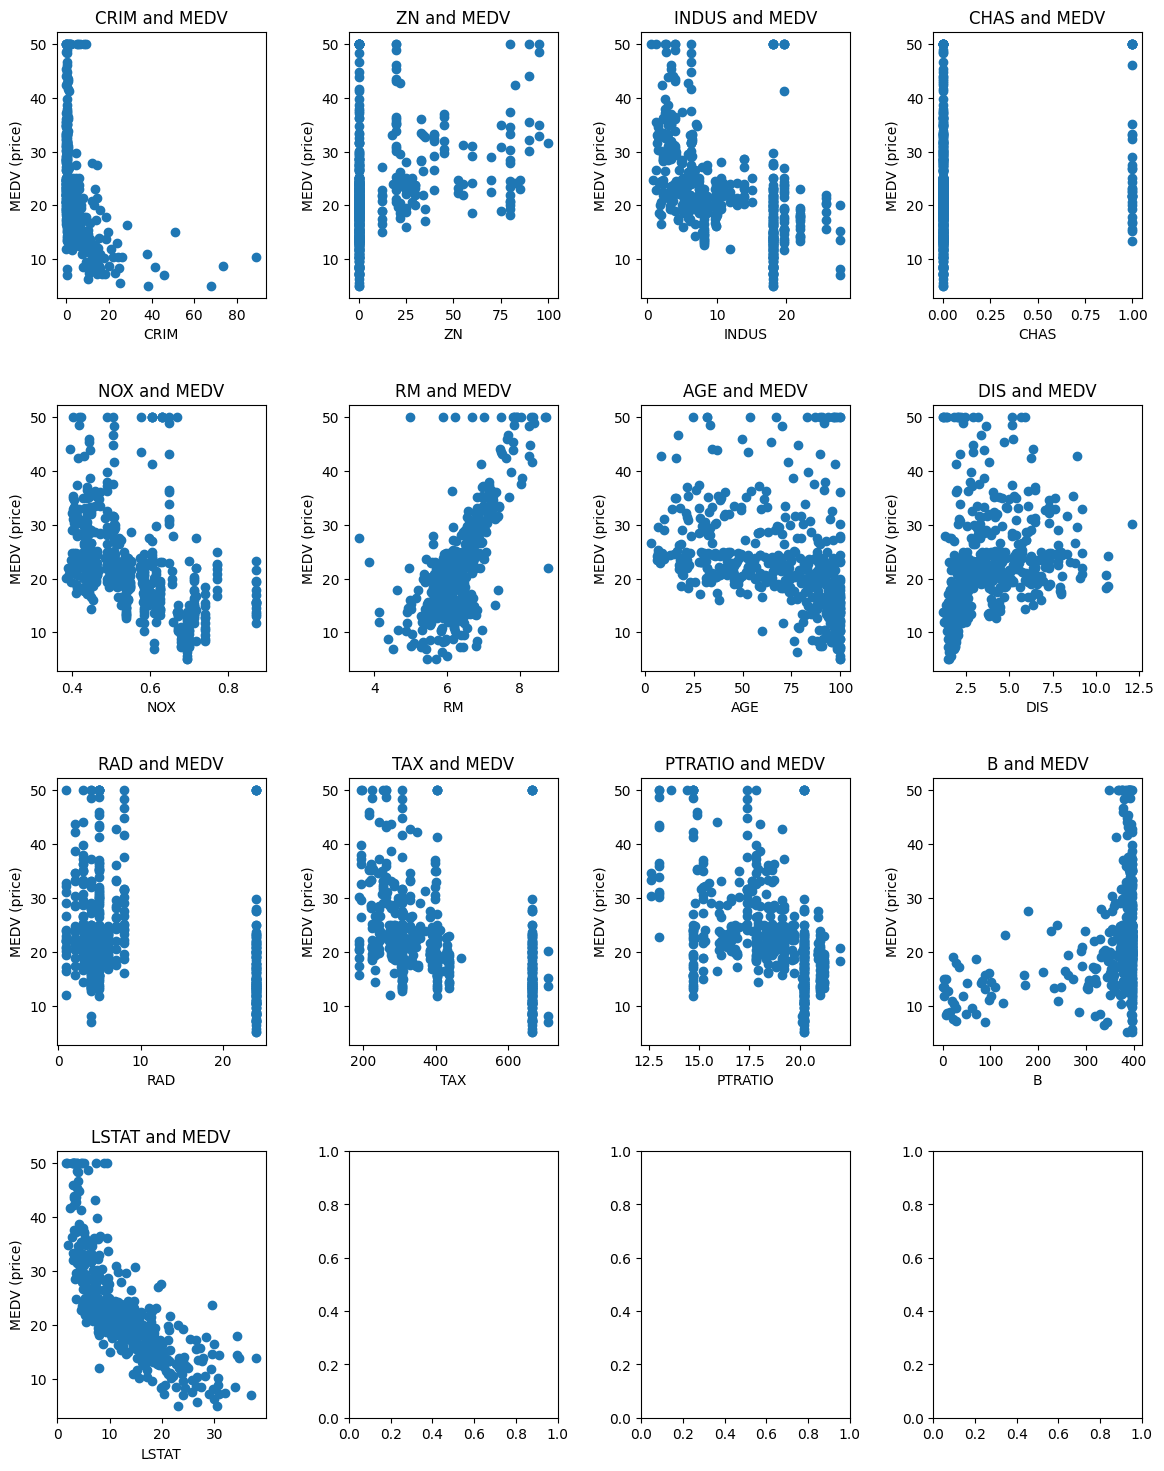

In [119]:
# 2.1 how does each feature relate to the price
import matplotlib.pyplot as plt
plt.figure()
fig,axes = plt.subplots(4, 4, figsize=(14,18))
fig.subplots_adjust(wspace=.4, hspace=.4)
img_index = 0
for i in range(boston.feature_names.size):
    row, col = i // 4, i % 4
    axes[row][col].scatter(feature[:,i], price)
    axes[row][col].set_title(boston.feature_names[i] + ' and MEDV')
    axes[row][col].set_xlabel(boston.feature_names[i])        
    axes[row][col].set_ylabel('MEDV (price)')
plt.show()

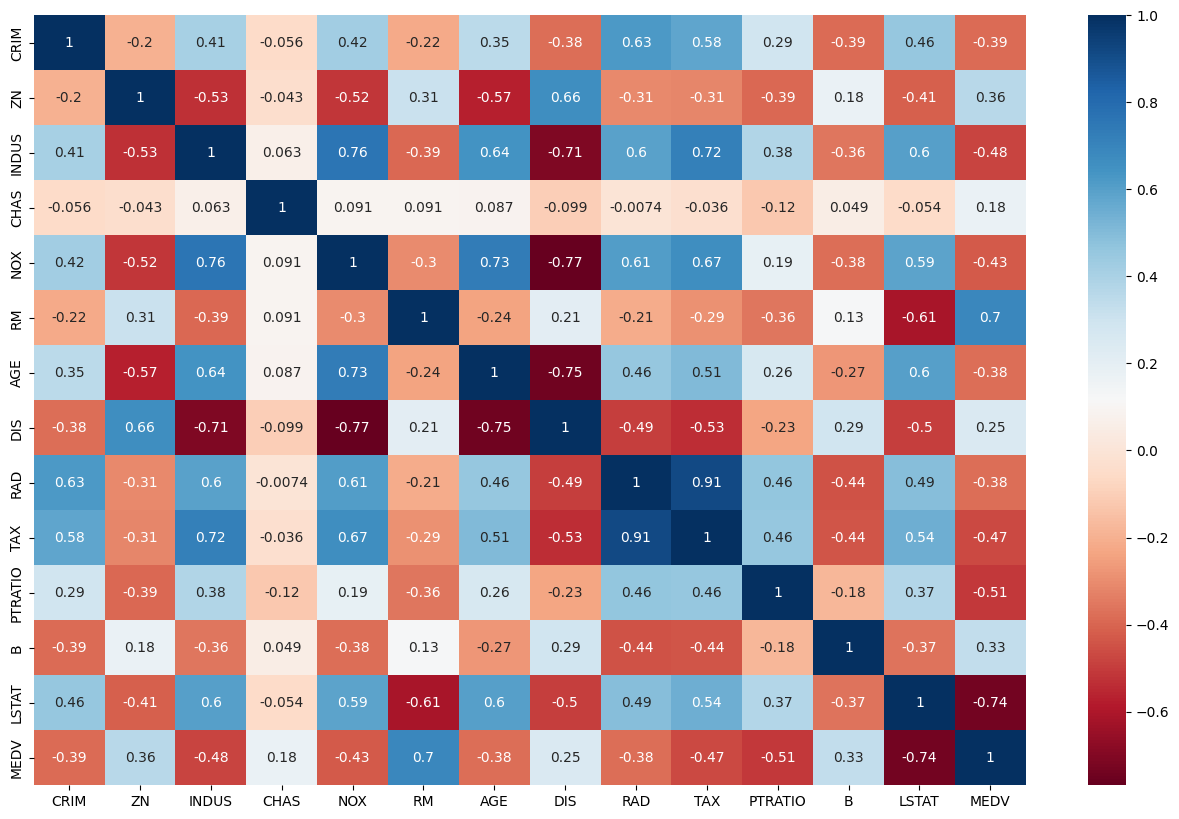

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [120]:
# 2.2 correlation matrix
import seaborn as sns
fig, ax = plt.subplots(figsize=(16, 10))
correlation = df_boston.corr()
sns.heatmap(correlation, annot = True, cmap = 'RdBu')
plt.show()
correlation

In [121]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, price, test_size=0.3, random_state=8)

In [122]:
# 2.3 linear regression and ridge regression
import numpy as np

def least_square(X, y):
    #TODO
    # The Normal Equation
    theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    return theta

def ridge_reg(X, y, eta):
    #TODO
    n,m = X.shape
    I = np.eye(m)
    theta = np.dot(np.linalg.inv(np.dot(X.T, X) + eta*I),np.dot(X.T,y))
    return theta
# apply linear regression
theta = least_square(X_train, y_train)
df_theta = pd.DataFrame(zip(boston.feature_names, theta),columns=['Feature','Coeff'])
df_theta


,Feature,Coeff
0,CRIM,-0.099324
1,ZN,0.052251
2,INDUS,0.004516
3,CHAS,2.957261
4,NOX,1.127938
5,RM,5.854198
6,AGE,-0.014957
7,DIS,-0.920844
8,RAD,0.159519
9,TAX,-0.008934


In [123]:
#apply ridge regression
theta_r = ridge_reg(X_train, y_train, 25.0)
df_theta_r = pd.DataFrame(zip(boston.feature_names, theta_r),columns=['Feature','Coeff'])
df_theta_r

,Feature,Coeff
0,CRIM,-0.101441
1,ZN,0.059705
2,INDUS,0.018527
3,CHAS,1.502442
4,NOX,0.334825
5,RM,5.375032
6,AGE,-0.001679
7,DIS,-0.834405
8,RAD,0.164127
9,TAX,-0.008917


In [124]:
# 2.4 evaluation
def pred_fn(X, theta):
    #TODO
    pred = np.dot(X, theta)
    return pred

def root_mean_square_error(pred, y):
    #TODO
    rmse = np.sqrt((np.sum((y - pred)**2))*(1/len(y)))
    return rmse


#for linear regression on training and test datasets
theta_training = least_square(X_train, y_train)
pred_training = pred_fn(X_train,theta_training)
rmse_train = root_mean_square_error(pred_training,y_train)
print("RMSE for training data with linear regression: ", rmse_train)

pred_test = pred_fn(X_test, theta_training)
rmse_test = root_mean_square_error(pred_test,y_test)
print("RMSE for test data with linear regression: ", rmse_test)

#for ridge regression on training and test datasets
theta_training_ridge = ridge_reg(X_train, y_train, 25)
pred_training_ridge = pred_fn(X_train, theta_training_ridge)
pred_test_ridge = pred_fn(X_test, theta_training_ridge)
rmse_train_ridge = root_mean_square_error(pred_training_ridge, y_train)
print("RMSE for training data with ridge regression: ", rmse_train_ridge)
rmse_test_ridge = root_mean_square_error(pred_test_ridge, y_test)
print("RMSE for test data with ridge regression: ", rmse_test_ridge)


RMSE for training data with linear regression:  4.820626531838223
RMSE for test data with linear regression:  5.2092175105308245
RMSE for training data with ridge regression:  4.857935708226584
RMSE for test data with ridge regression:  5.190927973729592


In [125]:
# 2.5 linear models of top-3 features
# linear regression using top-3 features
#TODO
# feature indices of the top-3 features
top_three_features = [12, 5, 10]
feature_names = df_feature.columns[top_three_features]
X_new = df_feature[feature_names].to_numpy()
Xnew_train, Xnew_test, ynew_train, ynew_test = train_test_split(X_new, price, test_size=0.3, random_state=8)

thetanew_train = least_square(Xnew_train, ynew_train)
prednew_training = pred_fn(Xnew_train, thetanew_train)
rmsenew_train = root_mean_square_error(prednew_training, ynew_train)

prednew_test = pred_fn(Xnew_test, thetanew_train)
rmsenew_test = root_mean_square_error(prednew_test,ynew_test)

# ridge regression using top-3 features
#TODO
thetanew_ridge_train = ridge_reg(Xnew_train,ynew_train,20.5)
prednew_ridge_training = pred_fn(Xnew_train,thetanew_ridge_train)
rmsenew_ridge_train = root_mean_square_error(prednew_ridge_training,ynew_train)

prednew_ridge_test = pred_fn(Xnew_test, thetanew_ridge_train)
rmsenew_ridge_test = root_mean_square_error(prednew_ridge_test,ynew_test)
print("RMSE of linear regression for new training data: ", rmsenew_train)
print("RMSE of linear regression for new test data: ", rmsenew_test)
print("RMSE of ridge regression for new training data: ", rmsenew_ridge_train)
print("RMSE of ridge regression for new test data: ", rmsenew_ridge_test)

RMSE of linear regression for new training data:  5.273361751695365
RMSE of linear regression for new test data:  5.494723646664586
RMSE of ridge regression for new training data:  5.284996295592014
RMSE of ridge regression for new test data:  5.467131102844189


In [126]:
# 2.6: Feature engineering techniques

#Scaling of features
n,m = feature.shape
# #feature = np.hstack((feature,np.matrix((feature[:,1].T)*feature[:,2])))
B = np.eye(m)
B = feature[:,12]*feature[:,5]
B = B.reshape(-1, 1) # reshape B to a 2x1 matrix

feature = np.concatenate((feature, B), axis=1)

C = np.eye(feature.shape[1])
C = np.sqrt(feature[:,10])
C = C.reshape(-1,1)
feature = np.concatenate((feature,C),axis = 1)

D = np.eye(feature.shape[1])
D = np.sqrt(feature[:,5])
D = D.reshape(-1,1)
feature = np.concatenate((feature,D),axis = 1)

E = np.eye(feature.shape[1])
E = np.sqrt(feature[:,12])
E = E.reshape(-1,1)
feature = np.concatenate((feature,E),axis = 1)

E = np.eye(feature.shape[1])
E = np.sqrt(feature[:,3])
E = E.reshape(-1,1)
feature = np.concatenate((feature,E),axis = 1)

# for i in range(0,feature.shape[1]):
#     xi = np.mean(feature[:,i])
#     for k in range(0,feature.shape[0]):
#         feature[k,i] = (feature[k,i] - xi) 

Xf_train, Xf_test, yf_train, yf_test = train_test_split(feature, price, test_size=0.3, random_state=8)

Xfnew_train, Xfnew_test, yfnew_train, yfnew_test = train_test_split(Xf_train, yf_train, test_size=0.2, random_state=8)

thetaf_train = ridge_reg(Xfnew_train,yfnew_train,0.1)
predf_train = pred_fn(Xfnew_train,thetaf_train)
predf_test = pred_fn(Xfnew_test,thetaf_train)
rmsef_train = root_mean_square_error(predf_train, yfnew_train)
rmsef_test = root_mean_square_error(predf_test,yfnew_test)
print("RMSE for training set: ",rmsef_train)
print("RMSE for test set: ",rmsef_test)

RMSE for training set:  4.205191951856308
RMSE for test set:  3.076331330385517
